# 1. Título
Despesas e Transferências Totais da União (critério valor pago)

# 2. Membros (nome e número de matrícula)
Ana Carolina Gonçalves (2019436757)


Euller Saez Lage Silva (2019054501)


Fernanda Carolina da Silva Pereira (2019431380)


Gilliard Gabriel Rodrigues (2019054609)


Samuel William Almeida Santos (2019054978)

# 3. Descrição dos dados (qual a URL? qual o domínio? como os dados foram processados?)

Observação: conforme comentado no vídeo de apresentação (https://www.youtube.com/watch?v=Kwy2BuRcArQ), as colunas criadas foram ORCAMENTO.COD_DETALHAMENTO (concatenando as colunas de FUNCAO.ID_FUNCAO_PT e SUBFUNCAO.ID_SUBFUNCAO_PT) e ORCAMENTO.UNIDADE_ORCAMENTARIA_TIPO (pegando apenas a primeira palavra contida na coluna ORCAMENTO.UNIDADE_ORCAMENTARIA_DESCRICAO)

In [ ]:
import pandas as pd
import sqlite3
import sqlalchemy

dfTotal = pd.read_csv('https://raw.githubusercontent.com/SamuelWas/Trabalho2IBD/main/dataset.csv', error_bad_lines=False, sep=';')
conn = sqlite3.connect('DespesasUniao.db')
c = conn.cursor()
dfTotal.head()

,COD_DESPESA,DESPESAS_PAGAS,RESTOS_A_PAGAR_PAGOS,PAGAMENTOS_TOTAIS,ORGAO_CODIGO,ORGAO_DESCRICAO,UNIDADE_ORCAMENTARIA_CODIGO,UNIDADE_ORCAMENTARIA_DESCRICAO,UNIDADE_ORCAMENTARIA_TIPO,COD_DETALHAMENTO,ID_FUNCAO_PT,NO_FUNCAO_PT,ID_SUBFUNCAO_PT,NO_SUBFUNCAO_PT,ID_PROGRAMA_PT,NO_PROGRAMA_PT,ACAO,PRIMARIA_FINANCEIRA,PODER,TRATAMENTO,NO_ACAO,ID_ANO,ID_MES
0,464879,"17863,97",0,"17863,97",26000,MINISTERIO DA EDUCACAO,26249,UNIVERSIDADE FEDERAL RURAL DO RIO DE JANEIRO,UNIVERSIDADE,12364,12,EDUCACAO,364,ENSINO SUPERIOR,32,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,20TP,Primária,EXE,Despesa sujeita ao teto,ATIVOS CIVIS DA UNIAO,2020,1
1,464880,"5183837,69",0,"5183837,69",59000,CONSELHO NACIONAL DO MINISTERIO PUBLICO,59101,CONSELHO NACIONAL DO MINISTERIO PUBLICOCNMP,CONSELHO,3122,3,ESSENCIAL A JUSTICA,122,ADMINISTRACAO GERAL,31,PROGRAMA DE GESTAO E MANUTENCAO DO MINISTERIO ...,20TP,Primária,CNMP,Despesa sujeita ao teto,ATIVOS CIVIS DA UNIAO,2020,1
2,464881,"890150,16",0,"890150,16",26000,MINISTERIO DA EDUCACAO,26284,FUN.UNIV.FED.DE CIENCIAS DA SAUDE DE P.ALEGRE,FUN.UNIV.FED.DE,12364,12,EDUCACAO,364,ENSINO SUPERIOR,32,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...,20TP,Primária,EXE,Despesa sujeita ao teto,ATIVOS CIVIS DA UNIAO,2020,1
3,464882,0,"14378992,13","14378992,13",26000,MINISTERIO DA EDUCACAO,26413,"INST.FED.DE EDUC.,CIENC.E TEC.DO TRIA.MINEIRO",INST.FED.DE,12363,12,EDUCACAO,363,ENSINO PROFISSIONAL,2109,PROGRAMA DE GESTAO E MANUTENCAO DO MINISTERIO ...,20TP,Primária,EXE,Despesa sujeita ao teto,ATIVOS CIVIS DA UNIAO,2020,1
4,464883,0,"16413567,93","16413567,93",26000,MINISTERIO DA EDUCACAO,26410,"INST.FED.DE EDUC.,CIENC.E TEC.DO NORTE DE MG",INST.FED.DE,12363,12,EDUCACAO,363,ENSINO PROFISSIONAL,2109,PROGRAMA DE GESTAO E MANUTENCAO DO MINISTERIO ...,20TP,Primária,EXE,Despesa sujeita ao teto,ATIVOS CIVIS DA UNIAO,2020,1


In [ ]:
# c.execute('DROP TABLE DESPESA')

#DESPESA
sql_table = '''
CREATE TABLE DESPESA 
  (COD_DESPESA INT,
  DESPESAS_PAGAS REAL, 
  RESTOS_A_PAGAR_PAGOS, 
  PAGAMENTOS_TOTAIS INT, 
  ID_ANO INT, 
  ID_MES INT, 
  UNIDADE_ORCAMENTARIA_CODIGO INT,
  COD_DETALHAMENTO INT,
  ORGAO_CODIGO INT,
  ACAO,
  ID_PROGRAMA_PT, INT)
'''
c.execute(sql_table)
df = pd.DataFrame(dfTotal, columns=['COD_DESPESA', 'DESPESAS_PAGAS', 'RESTOS_A_PAGAR_PAGOS', 'PAGAMENTOS_TOTAIS',
                                    'ID_ANO', 'ID_MES', 'UNIDADE_ORCAMENTARIA_CODIGO', 'COD_DETALHAMENTO', 'ORGAO_CODIGO', 'ACAO', 'ID_PROGRAMA_PT'])
df.drop_duplicates(keep = 'first', inplace=True)
df.to_sql('DESPESA', conn, if_exists='replace', index = False)

sql_string = 'SELECT * FROM DESPESA'
df = pd.read_sql(sql_string, conn)
df.head()

,COD_DESPESA,DESPESAS_PAGAS,RESTOS_A_PAGAR_PAGOS,PAGAMENTOS_TOTAIS,ID_ANO,ID_MES,UNIDADE_ORCAMENTARIA_CODIGO,COD_DETALHAMENTO,ORGAO_CODIGO,ACAO,ID_PROGRAMA_PT
0,464879,"17863,97",0,"17863,97",2020,1,26249,12364,26000,20TP,32
1,464880,"5183837,69",0,"5183837,69",2020,1,59101,3122,59000,20TP,31
2,464881,"890150,16",0,"890150,16",2020,1,26284,12364,26000,20TP,32
3,464882,0,"14378992,13","14378992,13",2020,1,26413,12363,26000,20TP,2109
4,464883,0,"16413567,93","16413567,93",2020,1,26410,12363,26000,20TP,2109


In [ ]:
# c.execute('DROP TABLE DETALHAMENTO_FUNCAO')

# DETALHAMENTO_FUNCAO
sql_table = '''
CREATE TABLE DETALHAMENTO_FUNCAO
  (COD_DETALHAMENTO int,
  ID_FUNCAO_PT int,
  ID_SUBFUNCAO_PT int)
'''

c.execute(sql_table)
df = pd.DataFrame(dfTotal, columns=['COD_DETALHAMENTO', 'ID_FUNCAO_PT', 'ID_SUBFUNCAO_PT'])
df.drop_duplicates(keep = 'first', inplace=True)
df.to_sql('DETALHAMENTO_FUNCAO', conn, if_exists='replace', index = False)

sql_string = 'SELECT * FROM DETALHAMENTO_FUNCAO'
df = pd.read_sql(sql_string, conn)
df.head()

,COD_DETALHAMENTO,ID_FUNCAO_PT,ID_SUBFUNCAO_PT
0,12364,12,364
1,3122,3,122
2,12363,12,363
3,23122,23,122
4,26122,26,122


In [ ]:
# c.execute('DROP TABLE FUNCAO')

# FUNCAO
sql_table = '''
CREATE TABLE FUNCAO 
  (ID_FUNCAO_PT int,
  NO_FUNCAO_PT text)
'''

c.execute(sql_table)
df = pd.DataFrame(dfTotal, columns=['ID_FUNCAO_PT', 'NO_FUNCAO_PT'])
df.drop_duplicates(keep = 'first', inplace=True)
df.to_sql('FUNCAO', conn, if_exists='replace', index = False)

sql_string = 'SELECT * FROM FUNCAO'
df = pd.read_sql(sql_string, conn)
df.head()

,ID_FUNCAO_PT,NO_FUNCAO_PT
0,12,EDUCACAO
1,3,ESSENCIAL A JUSTICA
2,23,COMERCIO E SERVICOS
3,26,TRANSPORTE
4,1,LEGISLATIVA


In [ ]:
 # c.execute('DROP TABLE SUBFUNCAO')

# SUBFUNCAO
sql_table = '''
CREATE TABLE SUBFUNCAO 
  (ID_SUBFUNCAO_PT int,
  NO_SUBFUNCAO_PT text)
'''

c.execute(sql_table)
df = pd.DataFrame(dfTotal, columns=['ID_SUBFUNCAO_PT', 'NO_SUBFUNCAO_PT'])
df.drop_duplicates(keep = 'first', inplace=True)
df.to_sql('SUBFUNCAO', conn, if_exists='replace', index = False)

sql_string = 'SELECT * FROM SUBFUNCAO'
df = pd.read_sql(sql_string, conn)
df.head()

,ID_SUBFUNCAO_PT,NO_SUBFUNCAO_PT
0,364,ENSINO SUPERIOR
1,122,ADMINISTRACAO GERAL
2,363,ENSINO PROFISSIONAL
3,302,ASSISTENCIA HOSPITALAR E AMBULATORIAL
4,368,EDUCACAO BASICA


In [ ]:

#c.execute('DROP TABLE ACAO')

# ACAO
sql_table = '''
CREATE TABLE ACAO 
  (ACAO int,
  NO_ACAO text,
  PRIMARIA_FINANCEIRA,
  TRATAMENTO)
'''

c.execute(sql_table)
df = pd.DataFrame(dfTotal, columns=['ACAO', 'NO_ACAO', 'PRIMARIA_FINANCEIRA', 'TRATAMENTO'])
df.drop_duplicates(keep = 'first', inplace=True)
df.to_sql('ACAO', conn, if_exists='replace', index = False)

sql_string = 'SELECT * FROM ACAO'
df = pd.read_sql(sql_string, conn)
df.head()

,ACAO,NO_ACAO,PRIMARIA_FINANCEIRA,TRATAMENTO
0,20TP,ATIVOS CIVIS DA UNIAO,Primária,Despesa sujeita ao teto
1,00PX,TRANSFERENCIA DE RECURSOS ARRECADADOS POR TAXA...,Primária,Despesa sujeita ao teto
2,44,FUNDO DE PARTICIPACAO DOS ESTADOS E DO DISTRIT...,Primária,Exceção: Transf. E/M
3,46,TRANSFERENCIA DA COTAPARTE DOS ESTADOS E DF EX...,Primária,Exceção: Transf. E/M
4,0C33,FUNDO DE MANUTENCAO E DESENVOLVIMENTO DA EDUCA...,Primária,Exceção: Transf. E/M


In [ ]:
#c.execute('DROP TABLE ORCAMENTO')

# ORCAMENTO
sql_table = '''
CREATE TABLE ORCAMENTO 
  (UNIDADE_ORCAMENTARIA_CODIGO,
  UNIDADE_ORCAMENTARIA_DESCRICAO,
  UNIDADE_ORCAMENTARIA_TIPO)
'''

c.execute(sql_table)
df = pd.DataFrame(dfTotal, columns=['UNIDADE_ORCAMENTARIA_CODIGO', 'UNIDADE_ORCAMENTARIA_DESCRICAO', 'UNIDADE_ORCAMENTARIA_TIPO'])
df.drop_duplicates(keep = 'first', inplace=True)
df.to_sql('ORCAMENTO', conn, if_exists='replace', index = False)

sql_string = 'SELECT * FROM ORCAMENTO'
df = pd.read_sql(sql_string, conn)
df.head()

,UNIDADE_ORCAMENTARIA_CODIGO,UNIDADE_ORCAMENTARIA_DESCRICAO,UNIDADE_ORCAMENTARIA_TIPO
0,26249,UNIVERSIDADE FEDERAL RURAL DO RIO DE JANEIRO,UNIVERSIDADE
1,59101,CONSELHO NACIONAL DO MINISTERIO PUBLICOCNMP,CONSELHO
2,26284,FUN.UNIV.FED.DE CIENCIAS DA SAUDE DE P.ALEGRE,FUN.UNIV.FED.DE
3,26413,"INST.FED.DE EDUC.,CIENC.E TEC.DO TRIA.MINEIRO",INST.FED.DE
4,26410,"INST.FED.DE EDUC.,CIENC.E TEC.DO NORTE DE MG",INST.FED.DE


In [ ]:
# c.execute('DROP TABLE ORGAO')

# ORGAO
sql_table = '''
CREATE TABLE ORGAO 
  (ORGAO_CODIGO,
  ORGAO_DESCRICAO,
  PODER)
'''

c.execute(sql_table)
df = pd.DataFrame(dfTotal, columns=['ORGAO_CODIGO', 'ORGAO_DESCRICAO', 'PODER'])
df.drop_duplicates(keep = 'first', inplace=True)
df.to_sql('ORGAO', conn, if_exists='replace', index = False)

sql_string = 'SELECT * FROM ORGAO'
df = pd.read_sql(sql_string, conn)
df.head()

,ORGAO_CODIGO,ORGAO_DESCRICAO,PODER
0,26000,MINISTERIO DA EDUCACAO,EXE
1,59000,CONSELHO NACIONAL DO MINISTERIO PUBLICO,CNMP
2,54000,MINISTERIO DO TURISMO,EXE
3,39000,MINISTERIO DA INFRAESTRUTURA,EXE
4,1000,CAMARA DOS DEPUTADOS,CD


In [ ]:

# c.execute('DROP TABLE PROGRAMA')

# PROGRAMA
sql_table = '''
CREATE TABLE PROGRAMA 
  (ID_PROGRAMA_PT,
  NO_PROGRAMA_PT)
'''

c.execute(sql_table)
df = pd.DataFrame(dfTotal, columns=['ID_PROGRAMA_PT', 'NO_PROGRAMA_PT'])
df.drop_duplicates(keep = 'first', inplace=True)
df.to_sql('PROGRAMA', conn, if_exists='replace', index = False)

sql_string = 'SELECT * FROM PROGRAMA'
df = pd.read_sql(sql_string, conn)
df.head()

,ID_PROGRAMA_PT,NO_PROGRAMA_PT
0,32,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...
1,31,PROGRAMA DE GESTAO E MANUTENCAO DO MINISTERIO ...
2,2109,PROGRAMA DE GESTAO E MANUTENCAO DO MINISTERIO ...
3,2128,PROGRAMA DE GESTAO E MANUTENCAO DO MINISTERIO ...
4,2126,PROGRAMA DE GESTAO E MANUTENCAO DO MINISTERIO ...


#4. Diagrama ER
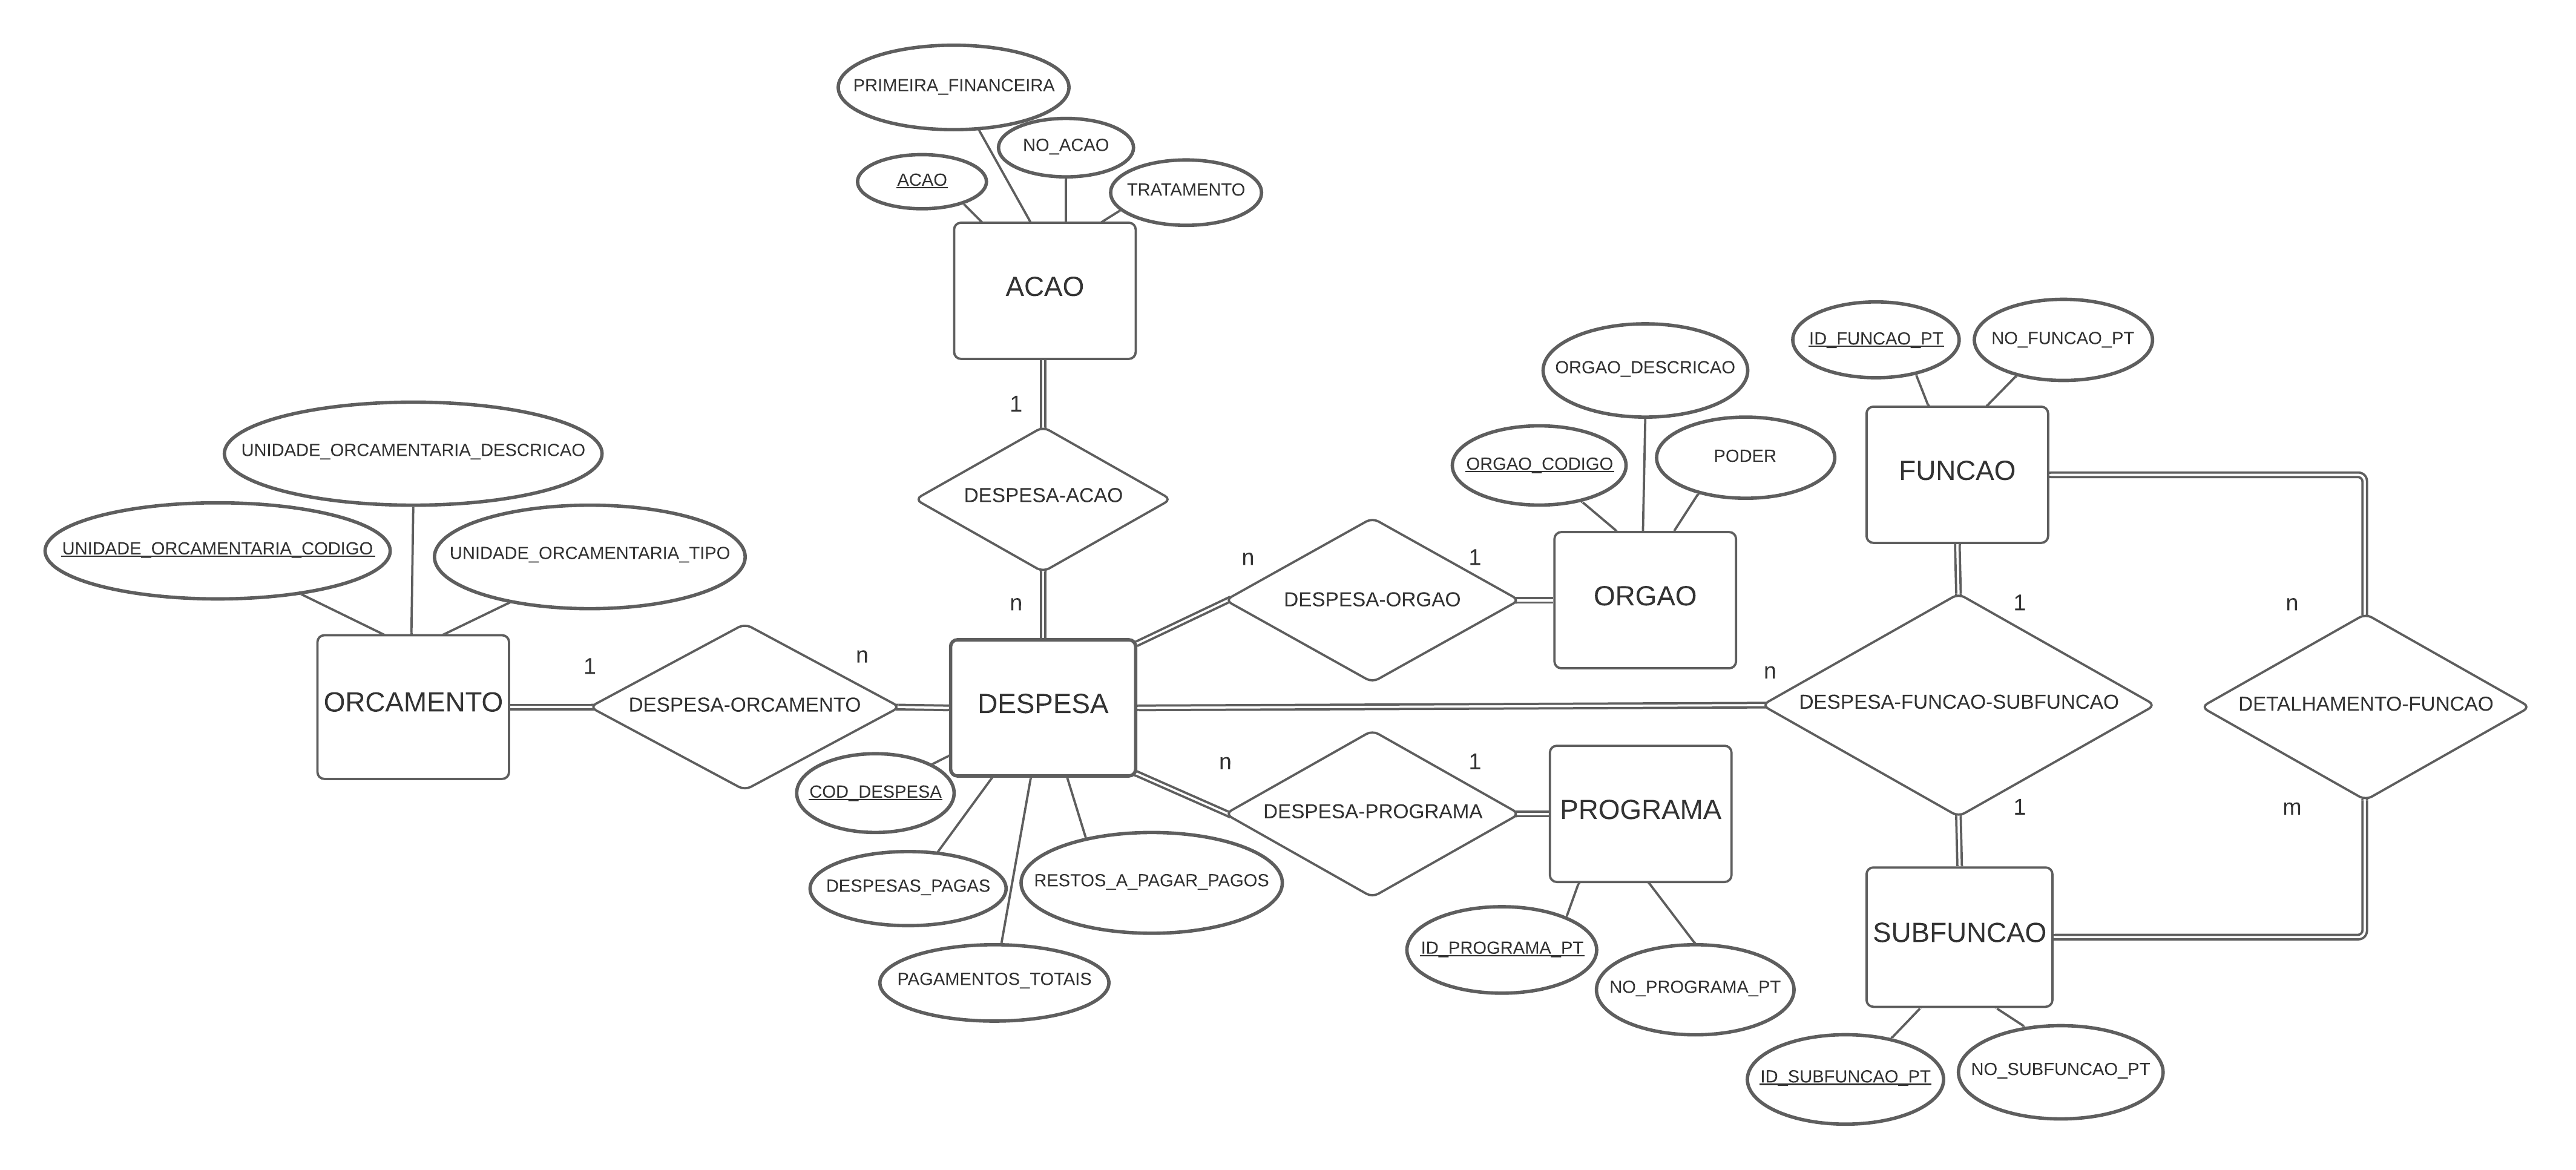

# 5. Diagrama relacional
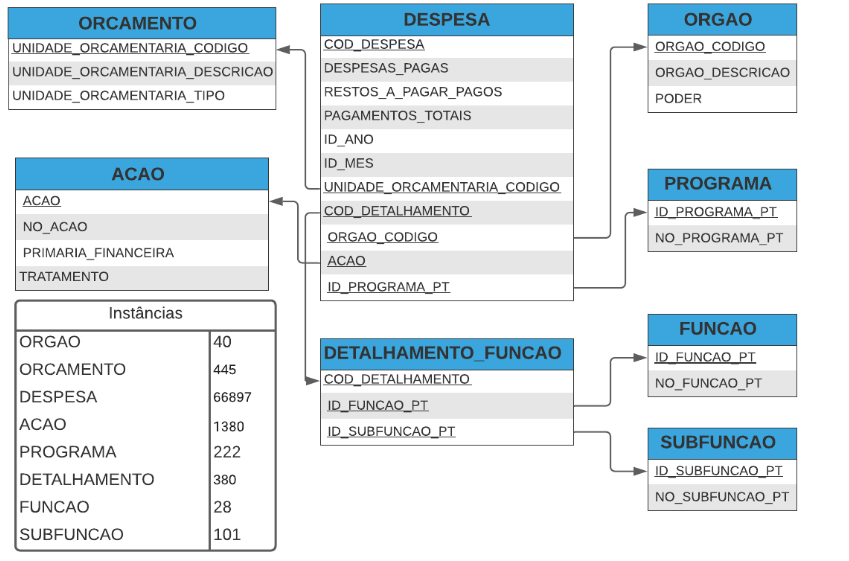


# 6. Consultas

## 6.1 Duas consultas envolvendo seleção e projeção

### 6.1.1 Consulta 1 (duas versões)

Retornar as descrições dos órgãos de poder “STF”.

In [ ]:
import time
start = time.time()

query = """
SELECT 
  ORGAO_DESCRICAO as Descricao
FROM 
  ORGAO AS O
WHERE
  O.PODER = 'STF'
"""

finish = time.time()
consulta_1 = finish-start

print('Consulta realizada em %.10f' %consulta_1,'segundos\n')
df = pd.read_sql_query(query, conn)
df

Consulta realizada em 0.0000255108 segundos



,Descricao
0,SUPREMO TRIBUNAL FEDERAL


In [ ]:
start = time.time()

query = """
SELECT DISTINCT 
  ORGAO_DESCRICAO as Descricao
FROM
  DESPESA NATURAL JOIN
  ORGAO AS O
WHERE
  O.PODER = 'STF'
"""

finish = time.time()
consulta_2 = finish-start

print('Consulta realizada em %.10f' %consulta_2,'segundos\n')
df = pd.read_sql_query(query, conn)
df

Consulta realizada em 0.0000305176 segundos



,Descricao
0,SUPREMO TRIBUNAL FEDERAL


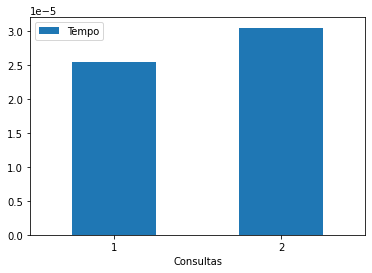

In [ ]:
#essa celula plota o grafico de comparação do tempo de execução de cada uma das duas queries 

query_df = pd.DataFrame({'Consultas':['1','2'],'Tempo':[consulta_1,consulta_2]})
axis = query_df.plot.bar(x='Consultas',y='Tempo',rot=0)

### 6.1.2 Consulta 2 (duas versões)

Retornar as descrições das unidades orçamentárias do tipo “UNIVERSIDADE”.

In [ ]:
start = time.time()

query = """
SELECT 
  UNIDADE_ORCAMENTARIA_DESCRICAO AS Descricao
FROM 
  ORCAMENTO AS ORC
WHERE 
  ORC.UNIDADE_ORCAMENTARIA_TIPO = 'UNIVERSIDADE'
"""

finish = time.time()
consulta_1 = finish-start

print('Consulta realizada em %.10f' %consulta_1,'segundos\n')
df = pd.read_sql_query(query, conn)
df

Consulta realizada em 0.0000462532 segundos



,Descricao
0,UNIVERSIDADE FEDERAL RURAL DO RIO DE JANEIRO
1,UNIVERSIDADE FEDERAL DO CEARA
2,UNIVERSIDADE FEDERAL DO PARANA
3,UNIVERSIDADE FED.VALES JEQUITINHONHA E MUCURI
4,UNIVERSIDADE FEDERAL DE JUIZ DE FORA
5,UNIVERSIDADE FEDERAL DE ITAJUBA MG
6,UNIVERSIDADE FEDERAL DO RIO GRANDE FURG
7,UNIVERSIDADE FEDERAL DO SUL DA BAHIA UFESBA
8,UNIVERSIDADE FEDERAL DO RIO DE JANEIRO
9,UNIVERSIDADE FEDERAL DO OESTE DO PARA


In [ ]:
start = time.time()

query = """
SELECT DISTINCT
  UNIDADE_ORCAMENTARIA_DESCRICAO AS Descricao
FROM 
  DESPESA NATURAL JOIN
  ORCAMENTO AS ORC
WHERE 
  ORC.UNIDADE_ORCAMENTARIA_TIPO = 'UNIVERSIDADE'
"""

finish = time.time()
consulta_2 = finish-start

print('Consulta realizada em %.10f' %consulta_2,'segundos\n')
df = pd.read_sql_query(query, conn)
df

Consulta realizada em 0.0000374317 segundos



,Descricao
0,UNIVERSIDADE FEDERAL RURAL DO RIO DE JANEIRO
1,UNIVERSIDADE FEDERAL DO CEARA
2,UNIVERSIDADE FEDERAL DO PARANA
3,UNIVERSIDADE FED.VALES JEQUITINHONHA E MUCURI
4,UNIVERSIDADE FEDERAL DE JUIZ DE FORA
5,UNIVERSIDADE FEDERAL DE ITAJUBA MG
6,UNIVERSIDADE FEDERAL DO RIO GRANDE FURG
7,UNIVERSIDADE FEDERAL DO SUL DA BAHIA UFESBA
8,UNIVERSIDADE FEDERAL DO RIO DE JANEIRO
9,UNIVERSIDADE FEDERAL DO OESTE DO PARA


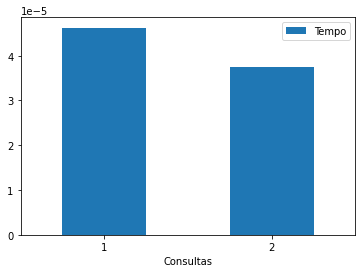

In [ ]:
query_df = pd.DataFrame({'Consultas':['1','2'],'Tempo':[consulta_1,consulta_2]})
axis = query_df.plot.bar(x='Consultas',y='Tempo',rot=0)

## 6.2 Três consultas envolvendo junção de duas relações

### 6.2.1 Consulta 3 (duas versões)

Retornar o nome e tratamento de todas ações realizados no ano de 2020 e mês 4.

In [ ]:
start = time.time()

query = """
SELECT DISTINCT
  A.NO_ACAO AS Nome, A.TRATAMENTO
FROM
  ACAO AS A
INNER JOIN DESPESA AS D
  ON D.ACAO = A.ACAO
WHERE
  D.ID_ANO = 2020 AND D.ID_MES = 4
"""

finish = time.time()
consulta_1 = finish-start

print('Consulta realizada em %.10f' %consulta_1,'segundos\n')
df = pd.read_sql_query(query, conn)
df

Consulta realizada em 0.0000641346 segundos



,Nome,TRATAMENTO
0,ATIVOS CIVIS DA UNIAO,Despesa sujeita ao teto
1,ATIVOS CIVIS DA UNIAO,Exceção: Créditos Extraordinários
2,ATIVOS CIVIS DOS EXTERRITORIOS E DO ANTIGO EST...,Despesa sujeita ao teto
3,PLEITOS ELEITORAIS,Exceção: Pleitos Eleitorais
4,SERVICOS PUBLICOS DE EDUCACAO DO DISTRITO FEDERAL,Exceção: FCDF
...,...,...
1003,FINANCIAMENTOS A MARINHA MERCANTE E A INDUSTRI...,Exceção: Despesa Financeira
1004,AQUISICAO DE TERRENOS E CONSTRUCAO DE UNIDADES...,Exceção: Despesa Financeira
1005,OBRIGACOES COM A GARANTIA DE CONTRATOS DE FINA...,Exceção: Despesa Financeira
1006,FINANCIAMENTO DE PROGRAMAS DE DESENVOLVIMENTO ...,Exceção: Despesa Financeira


In [ ]:
start = time.time()

query = """
SELECT DISTINCT
  A.NO_ACAO AS Nome, A.TRATAMENTO AS Tratamento
FROM
  ACAO AS A
INNER JOIN DESPESA AS D
  ON D.ACAO = A.ACAO
WHERE
  A.ACAO IN (SELECT DISTINCT ACAO FROM ACAO WHERE D.ID_ANO = 2020 AND D.ID_MES = 4)
"""

finish = time.time()
consulta_2 = finish-start

print('Consulta realizada em %.10f' %consulta_2,'segundos\n')
df = pd.read_sql_query(query, conn)
df

Consulta realizada em 0.0000388622 segundos



,Nome,Tratamento
0,ATIVOS CIVIS DA UNIAO,Despesa sujeita ao teto
1,FUNDO DE PARTICIPACAO DOS ESTADOS E DO DISTRIT...,Exceção: Transf. E/M
2,TRANSFERENCIA DA COTAPARTE DOS ESTADOS E DF EX...,Exceção: Transf. E/M
3,FUNDO DE MANUTENCAO E DESENVOLVIMENTO DA EDUCA...,Exceção: Transf. E/M
4,"FUNDO DE PARTICIPACAO DOS MUNICIPIOS FPM (CF,...",Exceção: Transf. E/M
...,...,...
1003,IMPLANTACAO E MODERNIZACAO DE INFRAESTRUTURA P...,Exceção: Créditos Extraordinários
1004,ATIVOS CIVIS DA UNIAO,Exceção: Créditos Extraordinários
1005,"BENEFICIOS OBRIGATORIOS AOS SERVIDORES CIVIS, ...",Exceção: Créditos Extraordinários
1006,APOIO AO DESENVOLVIMENTO DA EDUCACAO BASICA,Exceção: Créditos Extraordinários


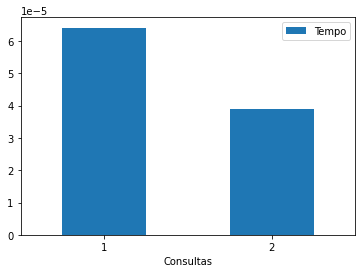

In [ ]:
query_df = pd.DataFrame({'Consultas':['1','2'],'Tempo':[consulta_1,consulta_2]})
axis = query_df.plot.bar(x='Consultas',y='Tempo',rot=0)

### 6.2.2 Consulta 4 (duas versões)

Retornar a descrição das unidades orçamentárias que tiveram despesas no ano de 2020 e no mês 6.

In [ ]:
start = time.time()

query = """
SELECT DISTINCT
  O.UNIDADE_ORCAMENTARIA_DESCRICAO AS Descricao
FROM
  ORCAMENTO AS O
INNER JOIN DESPESA AS D
  ON D.UNIDADE_ORCAMENTARIA_CODIGO = O.UNIDADE_ORCAMENTARIA_CODIGO
WHERE
  D.ID_ANO = 2020 AND D.ID_MES = 6
"""

finish = time.time()
consulta_1 = finish-start

print('Consulta realizada em %.10f' %consulta_1,'segundos\n')
df = pd.read_sql_query(query, conn)
df

Consulta realizada em 0.0000488758 segundos



,Descricao
0,TRIBUNAL SUPERIOR DO TRABALHO
1,UNIVERSIDADE FED.VALES JEQUITINHONHA E MUCURI
2,"INST.FED.DE EDUC.,CIENC.E TEC.DO SUDESTE MG"
3,"INST.FED.DE EDUC.,CIENC.E TEC.DO R.DE JANEIRO"
4,TRIBUNAL REGIONAL ELEITORAL DO RIO G. DO SUL
...,...
403,REC.S/SUP. CAIXA CONST.CASAS P/PESSOAL DA MB
404,FUNDO DE DESENVOLVIMENTO DO CENTROOESTEFDCO
405,FUNDO DE COMPENSACAO E VARIACOES SALARIAIS
406,REC.SOB SUP.CAIXA DE FIN.IMOB.DA AERONAUTICA


In [ ]:
start = time.time()

query = """
SELECT DISTINCT
  O.UNIDADE_ORCAMENTARIA_DESCRICAO AS Descricao
FROM
  ORCAMENTO AS O
INNER JOIN DESPESA AS D
  ON D.UNIDADE_ORCAMENTARIA_CODIGO = O.UNIDADE_ORCAMENTARIA_CODIGO
WHERE
  O.UNIDADE_ORCAMENTARIA_CODIGO IN
    (SELECT 
      UNIDADE_ORCAMENTARIA_CODIGO
    FROM 
      ORCAMENTO 
    WHERE 
      D.ID_ANO = 2020 AND D.ID_MES = 6)
"""

finish = time.time()
consulta_2 = finish-start

print('Consulta realizada em %.10f' %consulta_2,'segundos\n')
df = pd.read_sql_query(query, conn)
df

Consulta realizada em 0.0000450611 segundos



,Descricao
0,UNIVERSIDADE FEDERAL RURAL DO RIO DE JANEIRO
1,CONSELHO NACIONAL DO MINISTERIO PUBLICOCNMP
2,FUN.UNIV.FED.DE CIENCIAS DA SAUDE DE P.ALEGRE
3,"INST.FED.DE EDUC.,CIENC.E TEC.DO TRIA.MINEIRO"
4,"INST.FED.DE EDUC.,CIENC.E TEC.DO NORTE DE MG"
...,...
403,FUNDO NACIONAL DO IDOSO FNI
404,FUNDACAO BIBLIOTECA NACIONAL
405,DEPARTAMENTO NACIONAL DE PRODUCAO MINERAL
406,MINISTERIO DAS COMUNICACOES


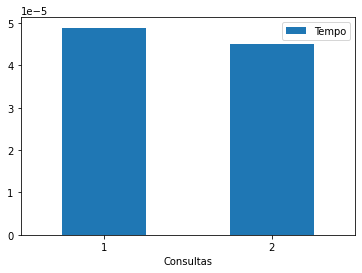

In [ ]:
query_df = pd.DataFrame({'Consultas':['1','2'],'Tempo':[consulta_1,consulta_2]})
axis = query_df.plot.bar(x='Consultas',y='Tempo',rot=0)

### 6.2.3 Consulta 5 (duas versões)

Retornar o nome das ações que possuem seus pagamentos totais entre 0 e 1000.

In [ ]:
start = time.time()

query = """
SELECT DISTINCT
  NO_ACAO
FROM
  DESPESA INNER JOIN
  ACAO
WHERE
  PAGAMENTOS_TOTAIS >= 0 AND PAGAMENTOS_TOTAIS <= 1000
"""

finish = time.time()
consulta_1 = finish-start

print('Consulta realizada em %.10f' %consulta_1,'segundos\n')
df = pd.read_sql_query(query, conn)
df

Consulta realizada em 0.0000464916 segundos



,NO_ACAO
0,ATIVOS CIVIS DA UNIAO
1,TRANSFERENCIA DE RECURSOS ARRECADADOS POR TAXA...
2,FUNDO DE PARTICIPACAO DOS ESTADOS E DO DISTRIT...
3,TRANSFERENCIA DA COTAPARTE DOS ESTADOS E DF EX...
4,FUNDO DE MANUTENCAO E DESENVOLVIMENTO DA EDUCA...
...,...
1319,CONSTRUCAO DE TRECHO RODOVIARIO DIVISA BA/MG ...
1320,CONSTRUCAO DE TRECHO RODOVIARIO ENTRONCAMENTO...
1321,ACOES COMPLEMENTARES DE PROTECAO SOCIAL BASICA
1322,FINANCIAMENTO REEMBOLSAVEL DE PROJETOS PARA MI...


In [ ]:
start = time.time()

query = """
SELECT DISTINCT
  NO_ACAO
FROM
  DESPESA NATURAL JOIN
  ACAO
WHERE
  ACAO IN
  (SELECT
    ACAO
  FROM
    DESPESA
  WHERE
    PAGAMENTOS_TOTAIS >= 0 AND PAGAMENTOS_TOTAIS <= 1000)
"""

finish = time.time()
consulta_2 = finish-start

print('Consulta realizada em %.10f' %consulta_2,'segundos\n')
df = pd.read_sql_query(query, conn)
df

Consulta realizada em 0.0000312328 segundos



,NO_ACAO
0,ATIVOS CIVIS DA UNIAO
1,SENTENCAS JUDICIAIS TRANSITADAS EM JULGADO (PR...
2,SENTENCAS JUDICIAIS DEVIDAS POR EMPRESAS ESTATAIS
3,"FOMENTO AS ACOES DE GRADUACAO, POSGRADUACAO, E..."
4,FUNCIONAMENTO E GESTAO DE INSTITUICOES HOSPITA...
...,...
57,ESTUDOS E PROJETOS PARA IMPLANTACAO DE PROJETO...
58,PESQUISA E INFORMACOES FLORESTAIS
59,AMPLIACAO DA REDE NACIONAL DE MONITORAMENTO ME...
60,REFORMAS DE EDIFICACOES DO MINISTERIO DA CIENC...


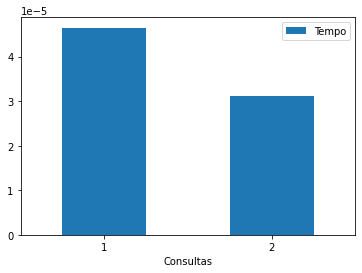

In [ ]:
query_df = pd.DataFrame({'Consultas':['1','2'],'Tempo':[consulta_1,consulta_2]})
axis = query_df.plot.bar(x='Consultas',y='Tempo',rot=0)

## 6.3 Três consultas envolvendo junção de três ou mais relações

### 6.3.1 Consulta 6 (duas versões)

Retornar o nome de todas as subfunções que se relacionam com a função “TRANSPORTE”.

In [ ]:
start = time.time()

query = """
SELECT
  NO_SUBFUNCAO_PT
FROM 
  DETALHAMENTO_FUNCAO NATURAL JOIN
  FUNCAO NATURAL JOIN
  SUBFUNCAO
WHERE
  NO_FUNCAO_PT = 'TRANSPORTE'
"""

finish = time.time()
consulta_1 = finish-start

print('Consulta realizada em %.10f' %consulta_1,'segundos\n')
df = pd.read_sql_query(query, conn)
df

Consulta realizada em 0.0000748634 segundos



,NO_SUBFUNCAO_PT
0,PLANEJAMENTO E ORCAMENTO
1,ADMINISTRACAO GERAL
2,NORMATIZACAO E FISCALIZACAO
3,TECNOLOGIA DA INFORMACAO
4,FORMACAO DE RECURSOS HUMANOS
5,ADMINISTRACAO DE CONCESSOES
6,COMUNICACAO SOCIAL
7,ATENCAO BASICA
8,PROTECAO E BENEFICIOS AO TRABALHADOR
9,SERVICOS URBANOS


In [ ]:
start = time.time()

query = """
SELECT
  NO_SUBFUNCAO_PT
FROM 
  DETALHAMENTO_FUNCAO NATURAL JOIN
  (SELECT * FROM FUNCAO WHERE NO_FUNCAO_PT = 'TRANSPORTE') NATURAL JOIN
  SUBFUNCAO  
"""

finish = time.time()
consulta_2 = finish-start

print('Consulta realizada em %.10f' %consulta_2,'segundos\n')
df = pd.read_sql_query(query, conn)
df

Consulta realizada em 0.0000336170 segundos



,NO_SUBFUNCAO_PT
0,PLANEJAMENTO E ORCAMENTO
1,ADMINISTRACAO GERAL
2,NORMATIZACAO E FISCALIZACAO
3,TECNOLOGIA DA INFORMACAO
4,FORMACAO DE RECURSOS HUMANOS
5,ADMINISTRACAO DE CONCESSOES
6,COMUNICACAO SOCIAL
7,ATENCAO BASICA
8,PROTECAO E BENEFICIOS AO TRABALHADOR
9,SERVICOS URBANOS


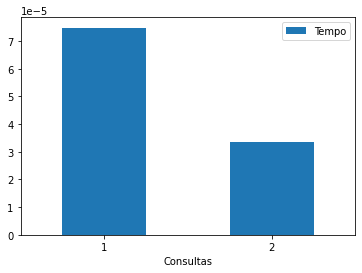

In [ ]:
query_df = pd.DataFrame({'Consultas':['1','2'],'Tempo':[consulta_1,consulta_2]})
axis = query_df.plot.bar(x='Consultas',y='Tempo',rot=0)

### 6.3.2 Consulta 7 (duas versões)

Retornar o nome de todos os programas do órgão “MINISTERIO DA EDUCACAO”.

In [ ]:
start = time.time()

query = """
SELECT DISTINCT
  NO_PROGRAMA_PT
FROM
  DESPESA NATURAL JOIN
  ORGAO NATURAL JOIN
  PROGRAMA
WHERE
  ORGAO_DESCRICAO = 'MINISTERIO DA EDUCACAO'
"""

finish = time.time()
consulta_1 = finish-start

print('Consulta realizada em %.10f' %consulta_1,'segundos\n')
df = pd.read_sql_query(query, conn)
df

Consulta realizada em 0.0000445843 segundos



,NO_PROGRAMA_PT
0,DESENVOLVIMENTO DA EDUCACAO PROFISSIONAL E TEC...
1,BRASIL UNIVERSITARIO
2,EDUCACAO BASICA
3,EDUCACAO PROFISSIONAL E TECNOLOGICA
4,"EDUCACAO SUPERIOR GRADUACAO, POSGRADUACAO, EN..."
5,EDUCACAO DE QUALIDADE PARA TODOS
6,PROGRAMA DE GESTAO E MANUTENCAO DO MINISTERIO ...
7,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...
8,EDUCACAO BASICA DE QUALIDADE
9,ESTATISTICAS E AVALIACOES EDUCACIONAIS


In [ ]:
start = time.time()

query = """
SELECT DISTINCT
  NO_PROGRAMA_PT
FROM
  DESPESA NATURAL JOIN
  (SELECT * FROM ORGAO WHERE ORGAO_DESCRICAO = 'MINISTERIO DA EDUCACAO') NATURAL JOIN
  PROGRAMA
"""

finish = time.time()
consulta_2 = finish-start

print('Consulta realizada em %.10f' %consulta_2,'segundos\n')
df = pd.read_sql_query(query, conn)
df

Consulta realizada em 0.0000305176 segundos



,NO_PROGRAMA_PT
0,DESENVOLVIMENTO DA EDUCACAO PROFISSIONAL E TEC...
1,BRASIL UNIVERSITARIO
2,EDUCACAO BASICA
3,EDUCACAO PROFISSIONAL E TECNOLOGICA
4,"EDUCACAO SUPERIOR GRADUACAO, POSGRADUACAO, EN..."
5,EDUCACAO DE QUALIDADE PARA TODOS
6,PROGRAMA DE GESTAO E MANUTENCAO DO MINISTERIO ...
7,PROGRAMA DE GESTAO E MANUTENCAO DO PODER EXECU...
8,EDUCACAO BASICA DE QUALIDADE
9,ESTATISTICAS E AVALIACOES EDUCACIONAIS


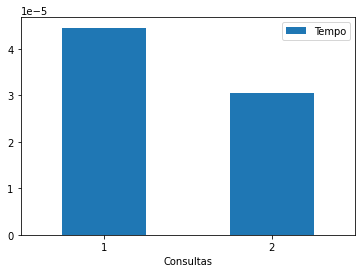

In [ ]:
query_df = pd.DataFrame({'Consultas':['1','2'],'Tempo':[consulta_1,consulta_2]})
axis = query_df.plot.bar(x='Consultas',y='Tempo',rot=0)

### 6.3.3 Consulta 8 (duas versões)

Retornar o nome de todos os órgãos que se relacionaram com orçamento de descrição “MINISTERIO DA FAZENDA” no ano de 2020.

In [ ]:
start = time.time()

query = """
SELECT DISTINCT
  ORGAO_DESCRICAO
FROM
  ORGAO
NATURAL JOIN
  DESPESA
NATURAL JOIN
  ORCAMENTO
WHERE
  ORCAMENTO.UNIDADE_ORCAMENTARIA_DESCRICAO = 'MINISTERIO DA FAZENDA' AND DESPESA.ID_ANO = '2020'
"""

finish = time.time()
consulta_1 = finish-start

print('Consulta realizada em %.10f' %consulta_1,'segundos\n')
df = pd.read_sql_query(query, conn)
df

Consulta realizada em 0.0000312328 segundos



,ORGAO_DESCRICAO
0,MINISTERIO DA ECONOMIA
1,MINISTERIO DA FAZENDA


In [ ]:
start = time.time()

query = """
SELECT DISTINCT
  ORGAO_DESCRICAO
FROM
  ORGAO
NATURAL JOIN
  (SELECT * FROM DESPESA WHERE DESPESA.ID_ANO = '2020')
NATURAL JOIN
  (SELECT * FROM ORCAMENTO WHERE ORCAMENTO.UNIDADE_ORCAMENTARIA_DESCRICAO = 'MINISTERIO DA FAZENDA')
"""

finish = time.time()
consulta_2 = finish-start

print('Consulta realizada em %.10f' %consulta_2,'segundos\n')
df = pd.read_sql_query(query, conn)
df

Consulta realizada em 0.0000307560 segundos



,ORGAO_DESCRICAO
0,MINISTERIO DA ECONOMIA
1,MINISTERIO DA FAZENDA


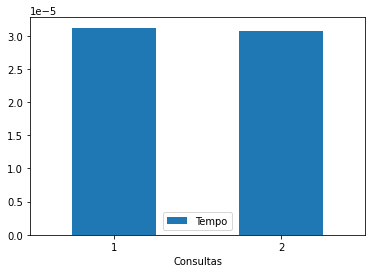

In [ ]:
query_df = pd.DataFrame({'Consultas':['1','2'],'Tempo':[consulta_1,consulta_2]})
axis = query_df.plot.bar(x='Consultas',y='Tempo',rot=0)

## 6.4 Duas consultas envolvendo agregação sobre junção de duas ou mais relações

### 6.4.1 Consulta 9 (duas versões)

Retornar a quantidade de despesas envolvendo a subfunção “Ensino Superior” em 2020.

In [ ]:
start = time.time()

query = """
SELECT 
  COUNT(COD_DESPESA)
FROM
  DESPESA AS D, DETALHAMENTO_FUNCAO AS DF, SUBFUNCAO AS SF
WHERE
  D.COD_DETALHAMENTO = DF.COD_DETALHAMENTO AND
  DF.ID_SUBFUNCAO_PT = SF.ID_SUBFUNCAO_PT AND
  SF.NO_SUBFUNCAO_PT = "ENSINO SUPERIOR" AND
  D.ID_ANO = 2020
"""

finish = time.time()
consulta_1 = finish-start

print('Consulta realizada em %.10f' %consulta_1,'segundos\n')
df = pd.read_sql_query(query, conn)
df

Consulta realizada em 0.0000591278 segundos



,COUNT(COD_DESPESA)
0,9329


In [ ]:
start = time.time()

query = """
SELECT 
  COUNT(PAGAMENTOS_TOTAIS)
FROM
  DESPESA AS D
NATURAL JOIN
  DETALHAMENTO_FUNCAO AS DF
NATURAL JOIN
  SUBFUNCAO AS SF
WHERE
  NO_SUBFUNCAO_PT = 'ENSINO SUPERIOR' AND
  ID_ANO = '2020'
"""

finish = time.time()
consulta_2 = finish-start

print('Consulta realizada em %.10f' %consulta_2,'segundos\n')
df = pd.read_sql_query(query, conn)
df

Consulta realizada em 0.0000312328 segundos



,COUNT(PAGAMENTOS_TOTAIS)
0,9329


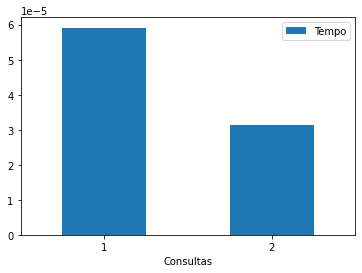

In [ ]:
query_df = pd.DataFrame({'Consultas':['1','2'],'Tempo':[consulta_1,consulta_2]})
axis = query_df.plot.bar(x='Consultas',y='Tempo',rot=0)

### 6.4.2 Consulta 10 (duas versões)

Retornar o nome do programa que possui a maior soma de pagamentos totais.

In [ ]:
start = time.time()


query = """
SELECT
  P.NO_PROGRAMA_PT
FROM
  PROGRAMA as P, DESPESA as D
WHERE
  P.ID_PROGRAMA_PT = D.ID_PROGRAMA_PT
GROUP BY
  D.PAGAMENTOS_TOTAIS
ORDER BY
  SUM(D.PAGAMENTOS_TOTAIS) DESC
LIMIT 1
"""

finish = time.time()
consulta_1 = finish-start

print('Consulta realizada em %.10f' %consulta_1,'segundos\n')
df = pd.read_sql_query(query, conn)
df

Consulta realizada em 0.0000474453 segundos



,NO_PROGRAMA_PT
0,OPERACOES ESPECIAIS: SERVICO DA DIVIDA INTERNA...


In [ ]:
start = time.time()

query = """
SELECT
  P.NO_PROGRAMA_PT
FROM
  PROGRAMA as P
NATURAL JOIN
  DESPESA as D
GROUP BY
  D.PAGAMENTOS_TOTAIS
ORDER BY
  SUM(D.PAGAMENTOS_TOTAIS) DESC
LIMIT 1
"""

finish = time.time()
consulta_2 = finish-start

print('Consulta realizada em %.10f' %consulta_2,'segundos\n')
df = pd.read_sql_query(query, conn)
df

Consulta realizada em 0.0000331402 segundos



,NO_PROGRAMA_PT
0,OPERACOES ESPECIAIS: SERVICO DA DIVIDA INTERNA...


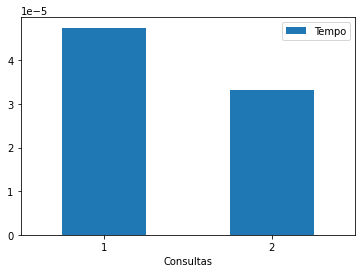

In [ ]:
query_df = pd.DataFrame({'Consultas':['1','2'],'Tempo':[consulta_1,consulta_2]})
axis = query_df.plot.bar(x='Consultas',y='Tempo',rot=0)

In [ ]:
conn.close()

# 7. Autoavaliação dos membros

# Ana
Creio que tive uma participação justa no trabalho pois participei das discussões sobre o trabalho e suas decisões. Além de ter estruturado 3 das queries apresentadas e dado auxilio na produção do esquema ER.


# Euller
Creio que tive uma participação justa no trabalho pois auxiliei em algumas decisões tomadas com relação ao próprio banco, além de ter formatado as células para comparação do tempo de execução e realizado a primeira query.

# Fernanda
Tive participação ativa na escolha do banco de dados para o projeto. Auxiliei no tratamento de dados para geração do csv atendendo às especificações do trabalho, como também na tomada de decisões pertinentes para seu desenvolvimento.

# Gilliard
Creio ter tido uma participação justa pelo fato de ter desenvolvido a modelagem do esquema ER, 3 das 20 queries e participado das discussões acerca do trabalho e suas decisões.

# Samuel
Participei ativamente da escolha de um base de dados que fosse compátivel com o projeto. Fui responsável por tratar os dados brutos do governo para gerar um csv que posteriormente atendesse os resquisitos de entidade e relacionamento pedido no trabalho, assim como criar as tabelas em SQL respeitando a modelagem dos diagramas. Além disso contribui na própria criação do diagrama relacional, dos enunciados de algumas queries e suas repostas. 